In [1]:
import pandas as pd

data_source = "/home/fra/DataMart/datacentre/olddata/"
train_file = "adult_train.csv"
test_file = "adult_test.csv"

# load data
df = pd.read_csv(data_source + train_file)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
import sys
mylib = '/home/fra/Project/pyProj/mlib'

In [3]:
sys.path.append(mylib)

In [4]:
target_col = 'INCOME'

In [5]:
exclusions=[]

In [6]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
ntransformer = StandardScaler
ctransformer = OrdinalEncoder

In [7]:
import utility as util
import explore as ex
import pipeline as pl
import transform as trf

In [8]:
(X, y, features, py, px) = pl.standard_feature_preprocess(df, target_col, ntransformer, ctransformer, exclusions)

In [9]:
from sklearn.model_selection import train_test_split
features = df.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
import xgboost as xgb
model = xgb.XGBClassifier().fit(X_train, y_train)

In [11]:
def print_model_performance(model, X_test, y_test):
    predictions = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)

    print("Accuracy: %f" % accuracy_score(y_test, predictions))
    print("Confustion Matrix: ")
    print(confusion_matrix(y_true=y_test, y_pred=predictions))
    print("AUC Score: %f" % roc_auc_score(y_test, pred_prob[:,1]))
    print("GINI Coefficient: %f" % (roc_auc_score(y_test, pred_prob[:,1])*2-1))

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [13]:
print_model_performance(model, X_test, y_test)

Accuracy: 0.871123
Confustion Matrix: 
[[7001  425]
 [ 834 1509]]
AUC Score: 0.925013
GINI Coefficient: 0.850025


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22792, 14), (9769, 14), (22792,), (9769,))

### Evaluation

In [27]:
from imp import reload

In [14]:
import evaluate as ev

/home/fra/Project/pyProj/pyml/pymlenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
estimator = xgb.XGBClassifier()

In [ ]:
id = ''

In [29]:
evaluator = ev.BinaryClassificationEvaluator(estimator, X_train, y_train, X_test, y_test, id, features, cv=3, target_f = 0)

In [30]:
evaluator.is_fitted()

True

In [31]:
evaluator.train()

In [32]:
evaluator.is_fitted()

True

In [33]:
evaluator.get_performance_metrics()

====================  confusion_matrix  ========================
[[7001  425]
 [ 834 1509]]
====================  classification_report  ===================
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7426
           1       0.78      0.64      0.71      2343

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769

====================  accuracy_score  ==========================
0.8711229399119664


In [25]:
evaluator.get_gini()

/home/fra/Project/pyProj/pyml/pymlenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8402565037029222

In [28]:
reload(ev)

<module 'evaluate' from '/home/fra/Project/pyProj/mlib/evaluate.py'>

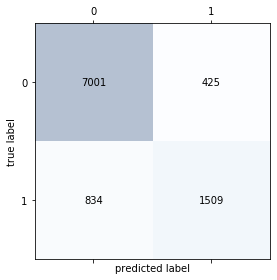

In [35]:
evaluator.show_confusion_matrix()

In [36]:
evaluator.get_num_target_levels()

2

In [37]:
evaluator.get_target_levels()

array([0, 1])

In [39]:
evaluator.kfold_validate()

====================  xgbclassifier  ===========================
3-Fold roc_auc score: 0.922 +/- 0.003


array([0.91751407, 0.92199441, 0.92552572])

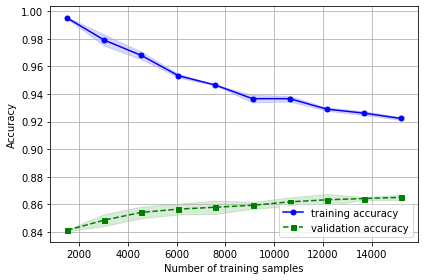

In [41]:
evaluator.plot_learning_curve()

In [42]:
X.shape

(32561, 14)

In [44]:
evaluator.get_lift_chart()

[(0.1, (0.0983032588203609, 0.21164048)),
 (0.2, (0.4901696741179639, 0.50665206)),
 (0.30000000000000004, (0.8173983301912199, 0.7042923)),
 (0.4, (0.9830325882036091, 0.8448044)),
 (0.5, (1.1446269862644762, 0.93521684)),
 (0.6, (1.2388903851333164, 0.9728633)),
 (0.7000000000000001, (1.2927551844869356, 0.9894284)),
 (0.8, (1.3075680043091849, 0.9960583)),
 (0.9, (1.311607864260705, 0.99911875)),
 (1.0, (1.3156477242122282, 0.9999914))]

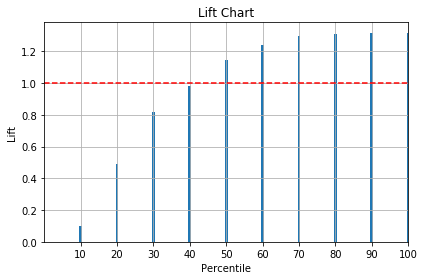

In [45]:
evaluator.plot_lift_chart()

In [47]:
# evaluator.get_importance_features()

In [49]:
# evaluator.plot_importance_features()

### grid search

In [52]:
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [1, 2, 5],
    'subsample': [0.6, 1.0],
    'colsample_bytree': [0.6, 1.0],
    'max_depth': [3, 4]
}

In [53]:
evaluator.grid_search_validate(params)

Best score (roc_auc): 0.926
Best params:
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
====================  gridsearchcv  ============================
3-Fold roc_auc score: 0.926 +/- 0.003


array([0.92261266, 0.92679123, 0.92997202])

In [54]:
gs = evaluator.grid_search(params)

Best score (roc_auc): 0.926
Best params:
{'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}


In [55]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)